<a href="https://colab.research.google.com/github/sundarp17/Data-science/blob/main/Machine-learning/clustering/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.preprocessing import scale

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [2]:
plt.figure(figsize=(7,4))


<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [3]:
iris = datasets.load_iris()

X=scale(iris.data)
y=pd.DataFrame(iris.target)

variable_names = iris.feature_names

X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

Building and running your model

In [4]:
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

Plotting your model outputs

In [5]:
iris_df = DataFrame(iris.data)
iris_df.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width']
y.columns = ['Targets']

In [6]:
iris_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


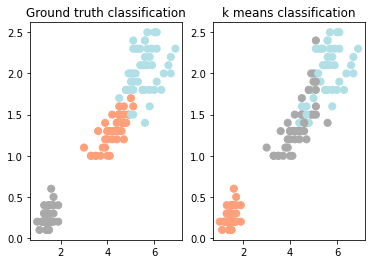

In [7]:
colors = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(iris_df.Petal_length,iris_df.Petal_width,c=colors[iris.target],s=50)
plt.title('Ground truth classification')


plt.subplot(1,2,2)

plt.scatter(iris_df.Petal_length,iris_df.Petal_width,c=colors[clustering.labels_],s=50)
plt.title('k means classification')

plt.show()


In [16]:
relabel = np.choose(clustering.labels_,[1,0,2]).astype(np.int64)


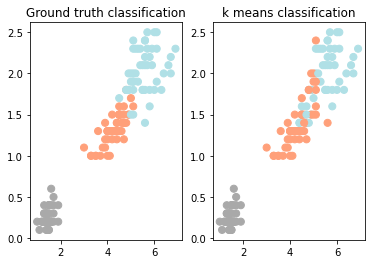

In [17]:

plt.subplot(1,2,1)

plt.scatter(iris_df.Petal_length,iris_df.Petal_width,c=colors[iris.target],s=50)
plt.title('Ground truth classification')


plt.subplot(1,2,2)

plt.scatter(iris_df.Petal_length,iris_df.Petal_width,c=colors[relabel],s=50)
plt.title('k means classification')

plt.show()

Evaluating 

In [18]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

